In [50]:
# Librerias

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import FunctionTransformer

In [2]:
# Funcion para Cargar la imagen
def load_image(image_path):
    """
    # Carga una imagen cuyo path se ingresa por parametro
    # image_path: String
    #            Ruta a la imagen a cargar
    """
    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

In [69]:
# Pre-procesamiento de la imagen:  
def image_processing(img_in, factor = 1, show = False): 

    """
    # Prepara una imagen para posteriormente un algoritmo de agrupación lo reciba    
    # Parámetros: 
    # img_in : datatype
    #          La imagen objetivo a procesar
    # factor : float
    #          El factor de reducción al que se desea submuestrear la imagen
    # show   : bool
    #          Activa o desactiva la visualización de la imagen y su versión submuestreada
    """
    # submuestreo para ahorrar recursos computacionales
    nuevo_ancho = int(img_in.shape[1]*factor)
    nuevo_alto = int(img_in.shape[0]*factor)
    nuevo_tamanio = (nuevo_ancho, nuevo_alto)

    img_submuestreada = cv2.resize(img_in, nuevo_tamanio)
    if show:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title(f'Imagen Original: {img_in.shape}')
        plt.imshow(img_in)
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.title(f'Imagen submuestreada: {img_submuestreada.shape}')
        plt.imshow(img_submuestreada)
        plt.axis('off')
        
    # Darle formato a la imagen
    img_final = img_submuestreada.reshape((-1, 3))/255
    (total_pixels,n) = img_final.shape
    return img_final

#Se crea el transformador del pre procesamiento de los datos
image_processing_transformer = FunctionTransformer(image_processing)

In [4]:
# Función de Scoring
def score_fn(modelo, data):
    modelo.fit(data)
    etiquetas = modelo.predict(data)
    return silhouette_score(data, etiquetas) # TODO: Experimentar con otras métricas

In [5]:
#Funcion para obtener la paleta de colores de una imagen especifica
def plotColorPallete(raw_image, colors):
    
    colors = np.clip(colors, 0, 1) 
    # Mostrar la imagen original junto con su paleta de colores
    fig, ax = plt.subplots(1,2,figsize=(5, 3))  
    
    ax[0].imshow(raw_image)
    ax[0].set_title('Imagen Original')
    ax[0].axis('off')
    
    # crear la paleta
    for i, color in enumerate(colors):
        ax[1].bar(i, height=1, color=color, edgecolor='none', width=1)
    
    ax[1].set_title('Paleta de Colores')
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

In [61]:
def getColorPallete(img_path): 
    #Cargar la imagen
    raw_image = load_image(img_path)
    # Implementacion del Pipeline
    params = {'n_clusters':[5,6,7]}
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
    
    pipe1 = Pipeline(steps=[('preprocesing',image_processing_transformer),
                           ('Param_search', GridSearchCV(KMeans(n_init = 10), param_grid = params, cv = kfold, scoring = silhouette_score, n_jobs = -1) )
                           ])#adjusted_rand_score
    pipe1.fit(raw_image)
    k = pipe1.named_steps['Param_search'].best_params_['n_clusters']                  
    pipe2 = Pipeline(steps =[('model', KMeans(n_clusters = k, n_init = 10)),
                             (" TSNE", print("TSNE TO DO"))
                            ])
    pipe2.fit(raw_image.reshape((-1, 3))/255)
    
    colors = pipe2.named_steps['model'].cluster_centers_
    print(f'La ruta de la imagen es :{img_path}')
    print(f'El mejor numero de clusters K es: {len(colors)}')
    # Crear Paleta de colores
    plotColorPallete(raw_image,colors)

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


TSNE TO DO
La ruta de la imagen es :img/img1.jpg
El mejor numero de clusters K es: 5


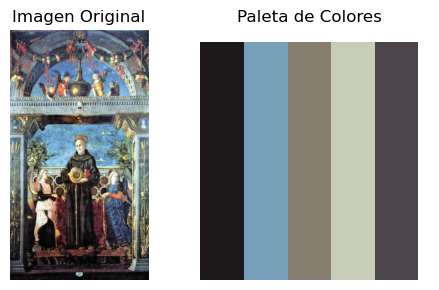

In [52]:
getColorPallete('img/img1.jpg')

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


TSNE TO DO
La ruta de la imagen es :img/img2.jpg
El mejor numero de clusters K es: 5


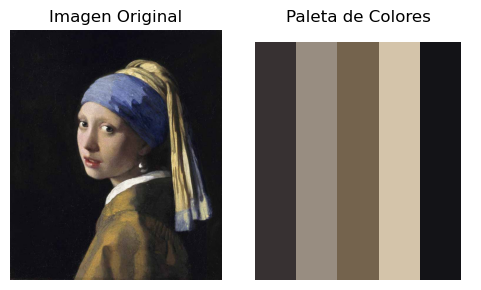

In [71]:
#Se obtiene la paleta para una image diferente
colores = getColorPallete('img/img2.jpg')

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


TSNE TO DO
La ruta de la imagen es :img/img3.jpg
El mejor numero de clusters K es: 5


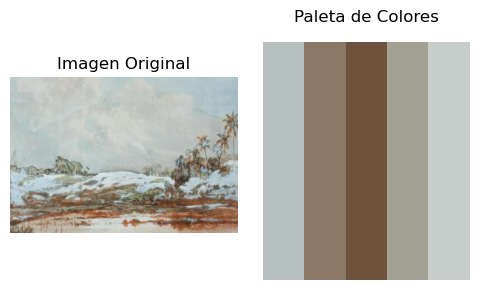

In [56]:
#Se obtiene la paleta para una image diferente
getColorPallete('img/img3.jpg')

C:\Users\julia\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


TSNE TO DO
La ruta de la imagen es :img/img4.jpg
El mejor numero de clusters K es: 5


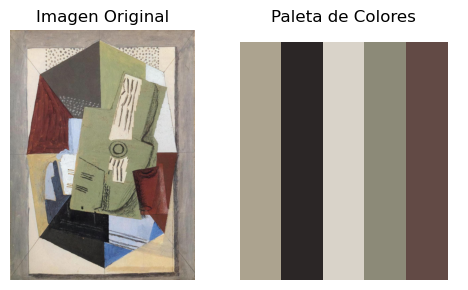

In [63]:
#Se obtiene la paleta para una image diferente
getColorPallete('img/img4.jpg')